In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinatins.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citypy module to determine city based on latitude and longitude. 
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

588

In [6]:
# Import the requests library. 
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [8]:
#requests.get(url+"&q=Boston").json()

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# loop through all the cities in the list. 
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    

# Run an API request for each of the cities. 
    try: 
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | sao joao da barra
Processing Record 3 of Set 1 | carnarvon
Processing Record 4 of Set 1 | ponta delgada
Processing Record 5 of Set 1 | coos bay
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | torbay
Processing Record 10 of Set 1 | yeppoon
Processing Record 11 of Set 1 | dingle
Processing Record 12 of Set 1 | chuy
Processing Record 13 of Set 1 | pangnirtung
Processing Record 14 of Set 1 | gibara
Processing Record 15 of Set 1 | sept-iles
Processing Record 16 of Set 1 | upernavik
Processing Record 17 of Set 1 | kibala
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | sokolo
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | mattru
Processing Record 22 of Set 1 | qaanaaq
Processing Reco

Processing Record 38 of Set 4 | port macquarie
Processing Record 39 of Set 4 | niksic
Processing Record 40 of Set 4 | sao filipe
Processing Record 41 of Set 4 | abbotsford
Processing Record 42 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 43 of Set 4 | kushmurun
Processing Record 44 of Set 4 | paamiut
Processing Record 45 of Set 4 | narsaq
Processing Record 46 of Set 4 | ha tinh
Processing Record 47 of Set 4 | olafsvik
Processing Record 48 of Set 4 | killarney
Processing Record 49 of Set 4 | surgut
Processing Record 50 of Set 4 | dehloran
Processing Record 1 of Set 5 | sakakah
Processing Record 2 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 3 of Set 5 | porto walter
Processing Record 4 of Set 5 | beringovskiy
Processing Record 5 of Set 5 | tual
Processing Record 6 of Set 5 | sokoto
Processing Record 7 of Set 5 | zolotinka
City not found. Skipping...
Processing Record 8 of Set 5 | montepuez
Processing Record 9 of Set 5 | talara
Processing Rec

Processing Record 25 of Set 8 | chirilagua
Processing Record 26 of Set 8 | pangody
Processing Record 27 of Set 8 | ahipara
Processing Record 28 of Set 8 | bacuit
City not found. Skipping...
Processing Record 29 of Set 8 | wilmington
Processing Record 30 of Set 8 | cururupu
Processing Record 31 of Set 8 | coquimbo
Processing Record 32 of Set 8 | arak
Processing Record 33 of Set 8 | general pico
Processing Record 34 of Set 8 | galiwinku
City not found. Skipping...
Processing Record 35 of Set 8 | hobyo
Processing Record 36 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 37 of Set 8 | gat
Processing Record 38 of Set 8 | hokitika
Processing Record 39 of Set 8 | arlit
Processing Record 40 of Set 8 | pacific grove
Processing Record 41 of Set 8 | turnov
Processing Record 42 of Set 8 | novikovo
Processing Record 43 of Set 8 | buin
Processing Record 44 of Set 8 | temaraia
City not found. Skipping...
Processing Record 45 of Set 8 | liuhe
Processing Record 46 of Set 8 | geraldto

Processing Record 15 of Set 12 | fare
Processing Record 16 of Set 12 | pitimbu
Processing Record 17 of Set 12 | falealupo
City not found. Skipping...
Processing Record 18 of Set 12 | den helder
Processing Record 19 of Set 12 | mergui
City not found. Skipping...
Processing Record 20 of Set 12 | longkou
Processing Record 21 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 22 of Set 12 | ayan
Processing Record 23 of Set 12 | ville-marie
Processing Record 24 of Set 12 | atbasar
Processing Record 25 of Set 12 | harnosand
Processing Record 26 of Set 12 | gornoye loo
Processing Record 27 of Set 12 | mumford
Processing Record 28 of Set 12 | codrington
Processing Record 29 of Set 12 | bourail
Processing Record 30 of Set 12 | namibe
Processing Record 31 of Set 12 | wanlaweyn
Processing Record 32 of Set 12 | ballina
Processing Record 33 of Set 12 | kawana waters
City not found. Skipping...
Processing Record 34 of Set 12 | darab
Processing Record 35 of Set 12 | leninskoye
Processing Record 

In [11]:
len(city_data)

539

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,73.08,77,34,19.28,PF,2021-09-22 21:00:00
1,Sao Joao Da Barra,-21.6403,-41.0511,71.69,64,26,23.09,BR,2021-09-22 21:00:00
2,Carnarvon,-24.8667,113.6333,64.47,94,26,6.91,AU,2021-09-22 21:00:00
3,Ponta Delgada,37.7333,-25.6667,70.52,73,20,6.91,PT,2021-09-22 21:00:01
4,Coos Bay,43.3665,-124.2179,78.85,65,69,8.03,US,2021-09-22 21:00:04
5,Mar Del Plata,-38.0023,-57.5575,59.02,67,90,3.44,AR,2021-09-22 20:57:12
6,Cape Town,-33.9258,18.4232,66.11,82,0,3.44,ZA,2021-09-22 20:58:36
7,Torbay,47.6666,-52.7314,68.88,59,100,12.08,CA,2021-09-22 21:00:09
8,Yeppoon,-23.1333,150.7333,51.58,75,41,7.16,AU,2021-09-22 21:00:09
9,Dingle,10.9995,122.6711,74.97,92,100,3.60,PH,2021-09-22 21:00:12


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-09-22 21:00:00,-23.1203,-134.9692,73.08,77,34,19.28
1,Sao Joao Da Barra,BR,2021-09-22 21:00:00,-21.6403,-41.0511,71.69,64,26,23.09
2,Carnarvon,AU,2021-09-22 21:00:00,-24.8667,113.6333,64.47,94,26,6.91
3,Ponta Delgada,PT,2021-09-22 21:00:01,37.7333,-25.6667,70.52,73,20,6.91
4,Coos Bay,US,2021-09-22 21:00:04,43.3665,-124.2179,78.85,65,69,8.03
5,Mar Del Plata,AR,2021-09-22 20:57:12,-38.0023,-57.5575,59.02,67,90,3.44
6,Cape Town,ZA,2021-09-22 20:58:36,-33.9258,18.4232,66.11,82,0,3.44
7,Torbay,CA,2021-09-22 21:00:09,47.6666,-52.7314,68.88,59,100,12.08
8,Yeppoon,AU,2021-09-22 21:00:09,-23.1333,150.7333,51.58,75,41,7.16
9,Dingle,PH,2021-09-22 21:00:12,10.9995,122.6711,74.97,92,100,3.60


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City ID")

In [15]:
weather_data_to_load = "weather_data/cities.csv"
city_data_df = pd.read_csv(weather_data_to_load)
city_data_df.head()

,City ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Rikitea,PF,2021-09-22 21:00:00,-23.1203,-134.9692,73.08,77,34,19.28
1,1,Sao Joao Da Barra,BR,2021-09-22 21:00:00,-21.6403,-41.0511,71.69,64,26,23.09
2,2,Carnarvon,AU,2021-09-22 21:00:00,-24.8667,113.6333,64.47,94,26,6.91
3,3,Ponta Delgada,PT,2021-09-22 21:00:01,37.7333,-25.6667,70.52,73,20,6.91
4,4,Coos Bay,US,2021-09-22 21:00:04,43.3665,-124.2179,78.85,65,69,8.03


In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

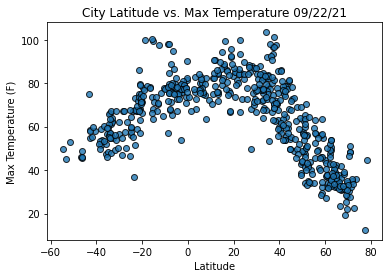

In [17]:
# Import the time module
import time

# Build the scatter plot for the latitude versus max temperature.
plt.scatter(lats, 
            max_temps, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label= "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid=(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

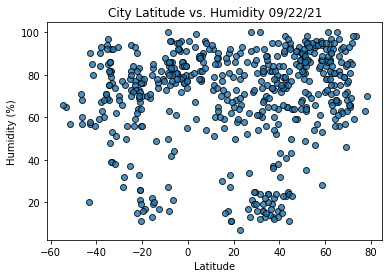

In [18]:
# Build the scatter plot for the latitude versus humidity.
plt.scatter(lats, 
            humidity, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label= "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid=(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

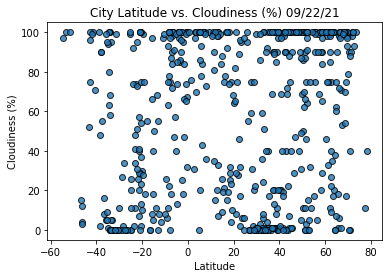

In [19]:
# Build the scatter plot for the latitude versus cloudiness.
plt.scatter(lats, 
            cloudiness, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label= "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid=(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

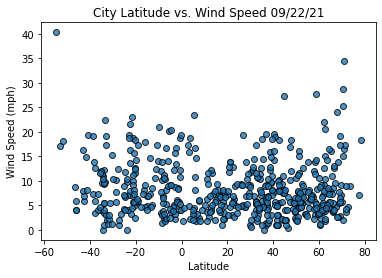

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid=True
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show the plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()
    

In [22]:
index13 = city_data_df.loc[13]
index13

City ID                        13
City                    Sept-Iles
Country                        CA
Date          2021-09-22 21:00:19
Lat                       50.2001
Lng                      -66.3821
Max Temp                    63.25
Humidity                       83
Cloudiness                     86
Wind Speed                   4.21
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4       True
       ...  
534     True
535     True
536     True
537     True
538     True
Name: Lat, Length: 539, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,3,Ponta Delgada,PT,2021-09-22 21:00:01,37.7333,-25.6667,70.52,73,20,6.91
4,4,Coos Bay,US,2021-09-22 21:00:04,43.3665,-124.2179,78.85,65,69,8.03
7,7,Torbay,CA,2021-09-22 21:00:09,47.6666,-52.7314,68.88,59,100,12.08
9,9,Dingle,PH,2021-09-22 21:00:12,10.9995,122.6711,74.97,92,100,3.60
11,11,Pangnirtung,CA,2021-09-22 21:00:15,66.1451,-65.7125,33.08,56,6,3.60


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

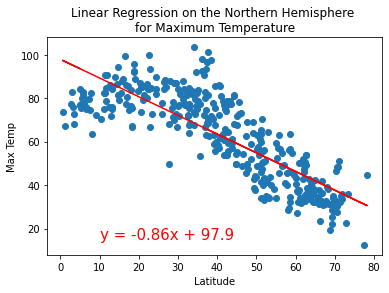

In [26]:
# Linear regression on the Northern Hemisphere for Maximum Temp.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \n"
                       "for Maximum Temperature", "Max Temp",(10,15))

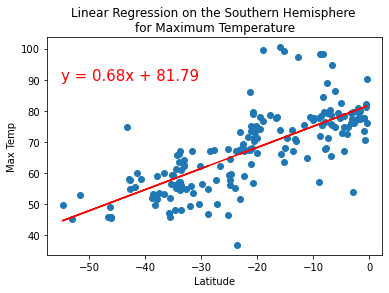

In [27]:
# Linear regression on the Southern Hemisphere for Maximum Temp.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n"
                      "for Maximum Temperature", "Max Temp", (-55,90))

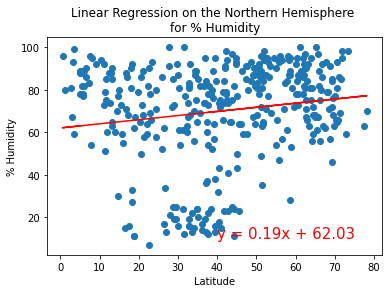

In [28]:
# Linear regression on the Northern Hemisphere for Humidity.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \n"
                       "for % Humidity", "% Humidity",(40,10))

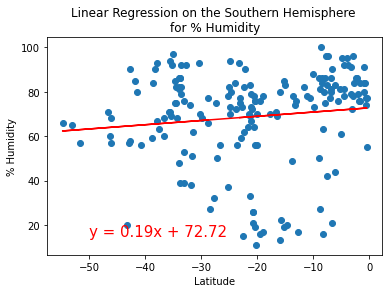

In [29]:
# Linear regression on the Southern Hemisphere for Humidity.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n"
                      "for % Humidity", "% Humidity", (-50,15))

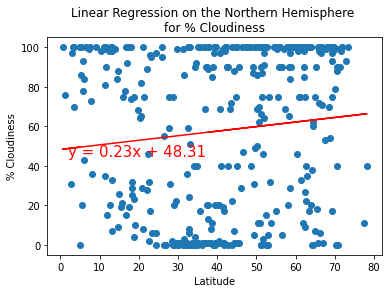

In [30]:
# Linear regression on the Northern Hemisphere for Cloudiness.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \n"
                       "for % Cloudiness", "% Cloudiness",(2,45))

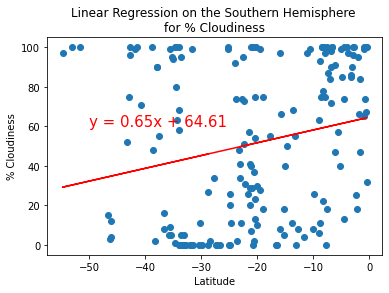

In [31]:
# Linear regression on the Southern Hemisphere for Cloudiness.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n"
                      "for % Cloudiness", "% Cloudiness", (-50,60))

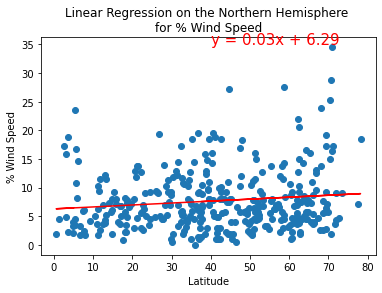

In [32]:
# Linear regression on the Northern Hemisphere for Wind Speed.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \n"
                       "for % Wind Speed", "% Wind Speed",(40,35))

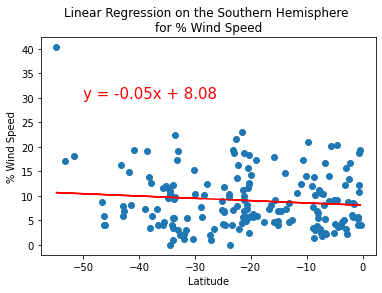

In [33]:
# Linear regression on the Southern Hemisphere for Wind Speed.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n"
                       "for % Wind Speed", "% Wind Speed",(-50,30))